# [Problem 15](https://projecteuler.net/problem=15): Lattice paths

Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.

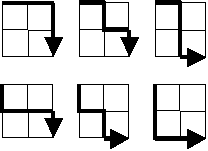

How many such routes are there through a 20×20 grid?

This problem is a lot like Pascal's triangle! For example, for the 2x2 grid the answer 6 is the center number of Pascal's triangle at level 5. I expect the answer to this problem will be the enter number of Pascal's triangle at level 41.

In [1]:
import numpy as np

The number of unique paths leading to a point on the grid is the sum of the number of paths leading to the point above and the number of paths leading to the point to the left. I can write a recursive function to calculate this for me:

In [2]:
def paths_to_point(row,col):
    ''' Computes the number of individual paths that lead to a point on the grid'''
    
    # if we are in the top left of the grid, there is only one way to get here
    if row == 0 and col == 0:
        return 1
    
    # if we are at the top of the grid, the number of paths equals the number of paths leading the the point to the left
    elif row == 0:
        return paths_to_point(row, col-1)
    
    # if we are at the left of the grid, the number of paths equals the number of paths leading to the point above
    elif col == 0:
        return paths_to_point(row-1, col)
    
    # if we are elsewhere, the the number of paths equals the sum of the number of paths to the point above and the point to the left
    else:
        return paths_to_point(row, col-1) + paths_to_point(row-1, col)

In [3]:
print(paths_to_point(2,2))

6


In [4]:
%%time
print(paths_to_point(12,12))

2704156
CPU times: total: 11.1 s
Wall time: 11.3 s


Unfortunately this recursive method takes too long for a grid of size 20. I will modify the function so that it stores values that are already computed in a grid, to avoid having to constantly redo calculations.

In [5]:
def paths_to_point_2(row,col,grid):
    ''' Computes the number of individual paths that lead to a point on the grid'''
    
    if grid[row][col] != 0:
        return grid[row][col]
    
    # if we are in the top left of the grid, there is only one way to get here
    if row == 0 and col == 0:
        grid[row][col] = 1
        return 1
    
    # if we are at the top of the grid, the number of paths equals the number of paths leading the the point to the left
    elif row == 0:
        grid[row][col] = paths_to_point_2(row, col-1,grid)
        return paths_to_point_2(row, col-1,grid)
    
    # if we are at the left of the grid, the number of paths equals the number of paths leading to the point above
    elif col == 0:
        grid[row][col] = paths_to_point_2(row-1, col,grid)
        return paths_to_point_2(row-1, col,grid)
    
    # if we are elsewhere, the the number of paths equals the sum of the number of paths to the point above and the point to the left
    else:
        grid[row][col] = paths_to_point_2(row, col-1,grid) + paths_to_point_2(row-1, col,grid)
        return paths_to_point_2(row, col-1,grid) + paths_to_point_2(row-1, col,grid)

In [6]:
def compute_paths(n):
    '''Computes the number of paths across a grid of size n'''
    grid = np.zeros((n+1,n+1))
    return paths_to_point_2(n,n,grid)

In [7]:
print(compute_paths(2))
print(compute_paths(20))

6.0
137846528820.0


This is the correct answer. Finally, I will re-write the function slightly differently. This way it is not recursive, but it builds up the grid of values (Pascal's triangle) from the top left.

In [8]:
def compute_paths_2(n):

    grid = np.zeros((n+1,n+1))

    for i in range(len(grid)):
        for j in range(len(grid)):
            
            # top left
            if i == 0 and j == 0:
                grid[i][j] = 1
                
            # top row
            elif i == 0:
                grid[i][j] = grid[i][j-1]
            
            # left column
            elif j == 0:
                grid[i][j] = grid[i-1][j]

            else:
                grid[i][j] = grid[i][j-1] + grid[i-1][j]

    return grid[n][n]

In [9]:
print(compute_paths_2(2))
print(compute_paths_2(20))

6.0
137846528820.0


I am curious which is faster:

In [10]:
%%time
print(compute_paths(500))

2.702882409454366e+299
CPU times: total: 4.3 s
Wall time: 4.37 s


In [11]:
%%time
print(compute_paths_2(500))

2.702882409454366e+299
CPU times: total: 1.5 s
Wall time: 1.53 s


The non-recursive function is quicker. I think the recursive function was pretty inefficient, there were some unecessary calculations.